In [72]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from random import shuffle
import numpy as np
from numpy import sin, cos, pi
import tensorflow as tf
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import IPython
import random

from scipy.io import wavfile

In [73]:
IN = 4
HIDDEN = 4
SAMPLE_RATE = 44100
DURATION = 1
OUT = SAMPLE_RATE*DURATION

In [74]:
def path(i):
    return "./rendered/clip-0{}.wav".format(i)

def readFile(i):
    sample_rate, data = wavfile.read(path(i))
    data_normalized = np.divide(data, 2.**14)
    
    return data_normalized, sample_rate

def vector(i):
    v = np.zeros(IN)
    v[i-1] = 1
    return np.asarray(v)

def dataPair(i):
    data, rate = readFile(i)
    return vector(i), data

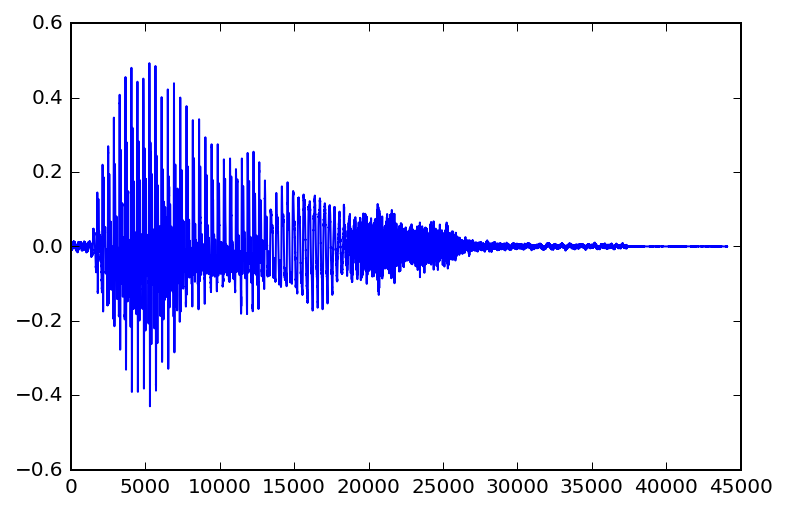

In [75]:
data, r = readFile(4)
plt.plot(data)
IPython.display.Audio(data, rate=r)

In [76]:
x = tf.placeholder('float', [None, IN])
targ = tf.placeholder('float', [None, OUT])

def unif(s):
    return tf.random_uniform(shape=s, minval=-.0001, maxval=.0001)
def a(x):
    return tf.tanh(x)

#layer
W1 = tf.Variable(unif([IN, OUT]))
#b1 = tf.Variable(unif([HIDDEN]))

#out1 = a(tf.matmul(x, W1))

#layer
#W2 = tf.Variable(unif([HIDDEN, OUT]))
#b2 = tf.Variable(unif([OUT]))

y = tf.matmul(x, W1)

sqr_error = tf.reduce_mean(tf.square(y - targ))
init = tf.initialize_all_variables()

In [77]:
sess = tf.Session()
sess.run(init)

In [102]:
ITERS = 10000
PROG = 10
LEARN_RATE = .8

train = tf.train.GradientDescentOptimizer(LEARN_RATE).minimize(sqr_error)

dataPairs = [dataPair(i+1) for i in xrange(IN)]

for i in xrange(ITERS):
    rand_pair = random.choice(dataPairs)
    sess.run(train, feed_dict={x: [rand_pair[0]], targ: [rand_pair[1]]})
    if i%int(ITERS / PROG) == 0:
        c = 0.0
        for n in xrange(IN):
            valid = dataPairs[n]
            c += sess.run(sqr_error, feed_dict={x: [valid[0]], targ: [valid[1]]})
        print 'cost', c

cost 0.0140281505883
cost 0.0138717605732
cost 0.0137147505302
cost 0.0135603765957
cost 0.0134071360808
cost 0.013257501414
cost 0.0131069617346
cost 0.0129602320958
cost 0.0128137988504
cost 0.0126695933286


Target


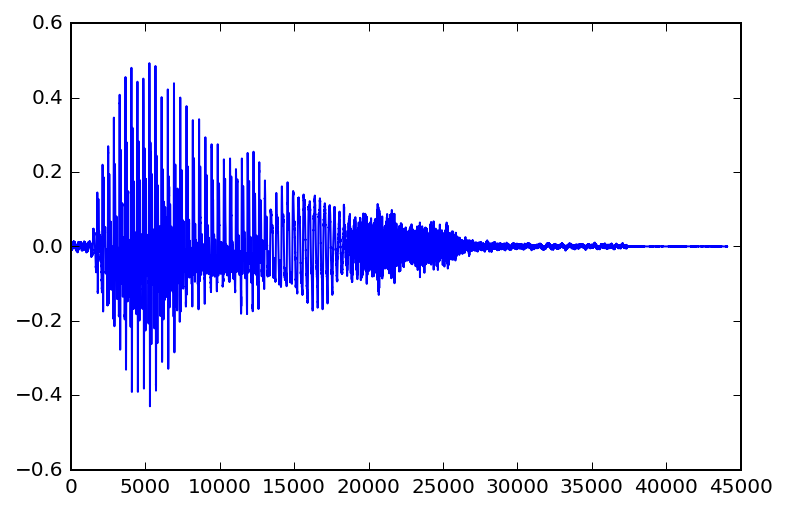

In [103]:
# Feed through a random i and see the audio output
test_word = np.random.randint(IN) + 1
test_word = 4
real_out, __ = readFile(test_word)

print 'Target'
plt.plot(real_out)
IPython.display.Audio(real_out, rate=SAMPLE_RATE)

Model output


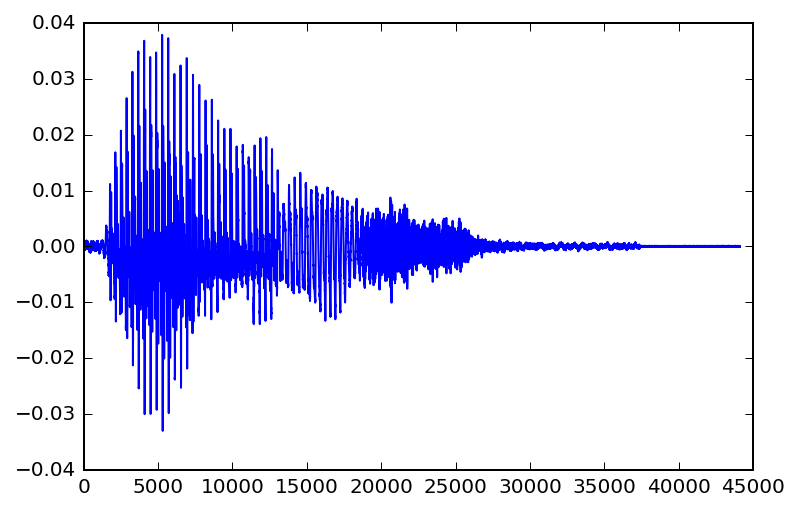

In [104]:
#plt.plot(model_out)
print 'Model output'

model_out = sess.run(y, feed_dict={x: [vector(test_word)]})[0]
plt.plot(model_out)
IPython.display.Audio(model_out, rate=SAMPLE_RATE)

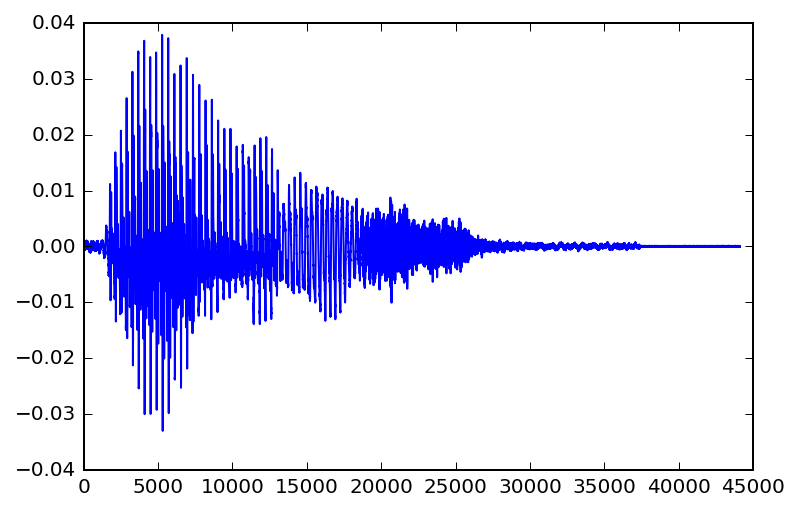

In [122]:
# Plot each row of learned weights
W1row = W1.eval(session=sess)[3,:]
plt.plot(W1row)
IPython.display.Audio(W1row, rate=SAMPLE_RATE)